<a href="https://colab.research.google.com/github/Bio-MingChen/DL_practice_by_Colab/blob/main/pytorch_test_20250804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.optim import Adam

| GPU 类型                       | 架构           | 显存            | FP16 性能           | 适合任务           | 相对性能评分      |
| ---------------------------- | ------------ | ------------- | ----------------- | -------------- | ----------- |
| **A100 GPU**                 | Ampere       | 40GB（Colab常配） | 非常强（\~312 TFLOPs） | 超大模型，训练+推理都快   | ⭐⭐⭐⭐⭐       |
| **L4 GPU**                   | Ada Lovelace | 24GB          | 中等（\~30 TFLOPs）   | 推理、轻量训练、视频处理   | ⭐⭐⭐⭐        |
| **T4 GPU**                   | Turing       | 16GB          | 较弱（\~8.1 TFLOPs）  | 推理、微调中小模型      | ⭐⭐          |
| **CPU**                      | -            | -             | 慢得多               | 调试、无 GPU 需求时使用 | ⭐           |
| **TPU v2-8 / v5e-1 / v6e-1** | 各代 TPU       | -             | 高度并行              | 专用于 TF 模型训练    | ⭐⭐⭐⭐（仅限 TF） |


| 用途                                   | 推荐硬件                      |
| ------------------------------------ | ------------------------- |
| 训练大模型（如 transformer、Diffusion、VAE 等） | ✅ **A100 GPU**（最佳）        |
| 微调 BERT/ResNet 等模型                   | ✅ **L4 GPU** 或 T4 GPU（够用） |
| 深度学习推理 / 小模型部署                       | ✅ **T4 GPU**（节省资源）        |
| 纯 numpy/pandas/CPU 推理                | ✅ CPU 就够                  |
| TensorFlow 专属大规模训练                   | ✅ TPU（仅 TF，不支持 PyTorch）   |


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


[Text(0.5, 1.0, 'ReLU curve'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

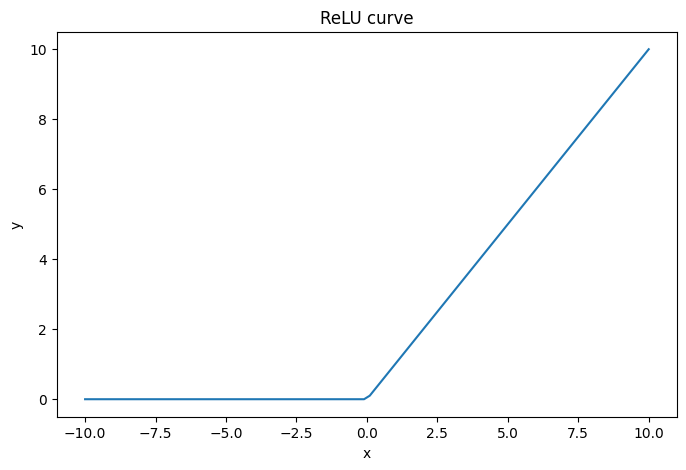

In [ ]:
import numpy as np

x = np.linspace(-10,10,100)
y = np.maximum(0,x)
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x,y)
ax.set(title="ReLU curve",xlabel="x", ylabel="y")


| 想要做的事情       | 应该用什么                                           |
| ------------ | ----------------------------------------------- |
| 生成等间距的值（含终点） | `np.linspace(start, stop, num)`                 |
| 生成等间距（不含终点）  | `np.linspace(start, stop, num, endpoint=False)` |
| 知道每个点之间距离    | `np.linspace(..., retstep=True)`                |


`plt.subplots()` 是 `matplotlib.pyplot` 中非常重要、推荐使用的一个函数，用于**创建图形（Figure）和坐标轴（Axes）对象**，是“面向对象”风格绘图的基础。

---

## 🧠 一句话解释：

> `plt.subplots()` 返回 `(fig, ax)`，即一个 **画布** 和一个或多个 **子图坐标轴**，方便你在上面画图并灵活控制布局。

---

## ✅ 基本用法示例：

```python
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = np.maximum(0, x)

fig, ax = plt.subplots()  # 创建画布和子图
ax.plot(x, y)             # 在子图上绘图
ax.set(title="ReLU", xlabel="x", ylabel="y")
plt.show()
```

---

## 📦 函数签名：

```python
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(w, h), sharex=False, sharey=False)
```

| 参数名             | 含义           |
| --------------- | ------------ |
| `nrows`         | 子图的行数        |
| `ncols`         | 子图的列数        |
| `figsize`       | 整个图的尺寸，单位是英寸 |
| `sharex/sharey` | 是否共享坐标轴      |

---

## 🧩 多子图示例：

```python
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # 创建2行2列共4个子图
axs[0, 0].plot(x, y)
axs[0, 0].set_title("Top left")
# 你还可以设置 axs[0,1], axs[1,0], axs[1,1] 等
```

⚠️ 当 `nrows*ncols > 1` 时，返回的是一个 **Axes数组（类似矩阵）**。

---

## 🔄 与 `plt.plot()` 有什么区别？

| 特点    | `plt.plot()` 风格 | `plt.subplots()` 风格 |
| ----- | --------------- | ------------------- |
| 代码风格  | 面向过程            | 面向对象                |
| 控制灵活性 | 低               | 高（适合子图、多图、嵌套布局）     |
| 推荐程度  | 初学者可用           | 正式绘图推荐 ✅            |

---

## ✅ 总结：

| 你想做的事情        | 是否用 `plt.subplots()` |
| ------------- | -------------------- |
| 简单快速画图        | ❌ 可用 `plt.plot()`    |
| 需要多个子图        | ✅ 强烈推荐               |
| 控制子图标题、轴标签、比例 | ✅                    |
| 更专业的图表设计      | ✅ 必须掌握               |

---

如果你需要我帮你画一个例子，比如 2x2 子图的布局，或对比 ReLU / Sigmoid / Tanh 等函数图像，我可以马上帮你画。


In [ ]:
training_data = FashionMNIST(root="data",train=True, download=True, transform=ToTensor())
test_data = FashionMNIST(root="data",train=False, download=True, transform=ToTensor())

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 168kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.21MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.0MB/s]


In [ ]:
BATCH_SIZE = 64
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)
print(f" batch number of train_dataloader: {len(train_dataloader)}\n size of traindataloader: {len(train_dataloader.dataset)}")

 batch number of train_dataloader: 938
 size of traindataloader: 60000


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.net = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(512, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(512, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.net(x)
    return logits

model = NeuralNetwork()
model = model.to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  model.train()
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 99:
      loss, current = loss.item(), batch * len(X)
      print(f"loss {loss:.4f} [{current}/{size}]")

def test(dataloader, model, loss_fn):
  model.eval()
  with torch.no_grad():
    correct = 0
    total_loss = 0
    size = len(dataloader.dataset)
    batches = len(dataloader)
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      loss = loss_fn(pred, y)
      total_loss += loss.item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  avg_loss = total_loss / batches
  acc = correct / size
  print(f"Test data: Avg loss: {avg_loss:.4f}, Accuracy: {acc:.4f}")

In [ ]:
epochs = 5

for t in range(epochs):
  print(f"Epoch {t}\n =============================")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Done")

Epoch 0
loss 0.2258 [6336/60000]
loss 0.2155 [12736/60000]
loss 0.2612 [19136/60000]
loss 0.1472 [25536/60000]
loss 0.2529 [31936/60000]
loss 0.1450 [38336/60000]
loss 0.0987 [44736/60000]
loss 0.1262 [51136/60000]
loss 0.3504 [57536/60000]
Test data: Avg loss: 0.3011, Accuracy: 0.9022
Epoch 1
loss 0.2523 [6336/60000]
loss 0.0943 [12736/60000]
loss 0.1954 [19136/60000]
loss 0.0997 [25536/60000]
loss 0.1561 [31936/60000]
loss 0.2020 [38336/60000]
loss 0.1873 [44736/60000]
loss 0.1885 [51136/60000]
loss 0.1718 [57536/60000]
Test data: Avg loss: 0.3258, Accuracy: 0.8908
Epoch 2
loss 0.1814 [6336/60000]
loss 0.2804 [12736/60000]
loss 0.1600 [19136/60000]
loss 0.2809 [25536/60000]
loss 0.1652 [31936/60000]
loss 0.2136 [38336/60000]
loss 0.1913 [44736/60000]
loss 0.2071 [51136/60000]
loss 0.0634 [57536/60000]
Test data: Avg loss: 0.3055, Accuracy: 0.8973
Epoch 3
loss 0.1787 [6336/60000]
loss 0.1560 [12736/60000]
loss 0.1251 [19136/60000]
loss 0.1659 [25536/60000]
loss 0.1687 [31936/60000]
lo

In [ ]:
torch.save(model.state_dict(), "FashionMNIST_fnn.pt")

In [ ]:
cp_model = NeuralNetwork()
cp_model.load_state_dict(torch.load("FashionMNIST_fnn.pt"))
cp_model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (net): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=512, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=512, out_features=10, bias=True)
  )
)

这是个非常常见又非常重要的问题，下面我从结构、功能和使用建议三个角度来解释：

---

## 🧱 一句话区分：

| 模块                          | 作用                                      |
| --------------------------- | --------------------------------------- |
| `torch.nn`                  | 面向对象的「模块化神经网络层」，比如 `nn.ReLU()` 是一个**类** |
| `torch.nn.functional` (`F`) | 面向函数的「无状态计算操作」，比如 `F.relu(x)` 是一个**函数** |

---

## 🔍 举例对比：ReLU 的两种写法

### ✅ 使用 `nn.ReLU`（模块方式）

```python
import torch.nn as nn

relu_layer = nn.ReLU()
output = relu_layer(x)
```

* 推荐用于 `nn.Sequential` 或 `nn.Module` 中注册为层。
* 可以保存到模型结构中。

---

### ✅ 使用 `F.relu`（函数方式）

```python
import torch.nn.functional as F

output = F.relu(x)
```

* 更灵活，通常在 `forward()` 函数内部临时调用。
* **不会出现在模型结构中**（不能保存为一层）。

---

## 🔄 更全面的区别：

| 对比项   | `nn.ReLU()`                     | `F.relu(x)`    |
| ----- | ------------------------------- | -------------- |
| 是否是类  | ✅ 是一个类                          | ❌ 是函数          |
| 是否有状态 | ✅ 有可能有（如 `Dropout(p)`）          | ❌ 无状态          |
| 用法    | `relu = nn.ReLU()` 然后 `relu(x)` | 直接 `F.relu(x)` |
| 适合场景  | 作为模型的一部分                        | 轻量/灵活操作        |
| 模型保存  | 会被保存进模型                         | 不会保存为模型结构      |

---

## 📌 示例：构建网络时的区别

### ✅ 推荐方式（注册模块）：

```python
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 5)
        self.relu = nn.ReLU()   # 注册了 ReLU 模块

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        return x
```

### ❗ 也可以这样写（函数方式）：

```python
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 5)

    def forward(self, x):
        x = self.linear(x)
        x = F.relu(x)  # 不注册，直接使用
        return x
```

两种方式都能用，区别主要在是否**可追踪/可保存为模块结构**。

---

## ✅ 总结建议：

| 你要做的事                        | 推荐方式                |
| ---------------------------- | ------------------- |
| 需要在 `__init__` 注册网络结构、保存模型结构 | ✅ 用 `nn.ReLU()`     |
| 在 `forward()` 内快速应用函数，不用注册   | ✅ 用 `F.relu(x)`     |
| 不确定是否需要保存为模块                 | 建议用 `nn.ReLU()` 更统一 |

---

需要我给出更多类似 `Dropout`、`Softmax`、`Conv2d` 的对比也可以继续讲。


In [ ]:
torch.accelerator.current_accelerator()

device(type='cuda')

这段代码是一个 **基于 PyTorch 的 MNIST 手写数字识别训练示例**。你提到的几个关键概念包括 `Adadelta`, `StepLR`, `transforms.Compose`, `train_kwargs` 等，下面我逐一进行详细解释。

---

## 🧠 1. `Adadelta` 优化器

```python
optimizer = optim.Adadelta(model.parameters(), lr=args.lr)
```

### 📌 是什么？

* `Adadelta` 是一种**自适应学习率优化器**，它不需要手动设置全局的学习率衰减 schedule。
* 相比传统 SGD，它会根据历史梯度动态调整每个参数的学习率。

### 🔧 特点：

* 优点：鲁棒性高，对初始学习率不敏感。
* 适合用于训练简单模型（比如这个 CNN）时快速收敛。

---

## 🧠 2. `StepLR` 学习率调度器

```python
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
```

### 📌 是什么？

* `StepLR` 是一种**学习率调度器（scheduler）**，用于**每隔若干 epoch 自动降低学习率**。

### 🧮 工作原理：

* 初始学习率为 `args.lr`
* 每 `step_size` 个 epoch，学习率变为原来的 `gamma` 倍
  例如：

  ```
  epoch 1: lr = 1.0
  epoch 2: lr = 1.0 × gamma
  epoch 3: lr = 1.0 × gamma²
  ```

---

## 🧠 3. `transforms.Compose`

```python
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
```

### 📌 是什么？

* `Compose` 是 `torchvision.transforms` 里的一个工具函数，用于**把多个数据预处理操作串联起来执行**。

### 🔧 在这里做了什么：

1. `transforms.ToTensor()`
   把 `PIL Image` 或 `numpy array` 转换为 `Tensor`，并自动把像素值从 \[0, 255] 缩放到 \[0, 1]。
2. `transforms.Normalize((0.1307,), (0.3081,))`
   标准化数据：减去均值再除以标准差，使得每张图片的分布更稳定，有利于模型训练。

---

## 🧠 4. `train_kwargs` 和 `test_kwargs`

```python
train_kwargs = {'batch_size': args.batch_size}
test_kwargs = {'batch_size': args.test_batch_size}
```

### 📌 是什么？

* `train_kwargs` 和 `test_kwargs` 是两个字典，用于传递参数给 `DataLoader`。

### 🧩 在开启加速时：

```python
accel_kwargs = {
    'num_workers': 1,
    'persistent_workers': True,
    'pin_memory': True,
    'shuffle': True
}
```

这些参数是为了加速数据加载：

| 参数                   | 含义                                   |
| -------------------- | ------------------------------------ |
| `num_workers`        | 开启多少个线程并行加载数据（>0 加速）                 |
| `persistent_workers` | epoch 间保留工作线程，避免频繁销毁                 |
| `pin_memory`         | 将数据加载到 CUDA 的 page-locked memory（更快） |
| `shuffle`            | 每个 epoch 重新打乱数据                      |

最终：

```python
train_loader = DataLoader(dataset1, **train_kwargs)
```

等价于：

```python
DataLoader(dataset1, batch_size=64, num_workers=1, pin_memory=True, shuffle=True)
```

---

## 🧪 额外知识点补充：

| 名称                               | 说明                                |
| -------------------------------- | --------------------------------- |
| `F.relu()`                       | 激活函数，输出为 `max(0, x)`              |
| `F.nll_loss()`                   | 负对数似然损失函数（常和 `log_softmax` 一起用）   |
| `model.train()` / `model.eval()` | 训练 / 推理模式的切换（控制 dropout 和 BN 层行为） |
| `torch.flatten(x, 1)`            | 扁平化除 batch 维外的所有维度                |
| `output.argmax(dim=1)`           | 获取预测结果中概率最大的类索引                   |

---

## ✅ 总结建议

| 名词                   | 建议理解方式                |
| -------------------- | --------------------- |
| `Adadelta`           | 一种不用手动调整学习率的优化器       |
| `StepLR`             | 每隔一定 epoch 衰减学习率      |
| `transforms.Compose` | 串联预处理操作，如归一化/转 tensor |
| `train_kwargs`       | 用于设置数据加载器的细节参数        |

---

如果你想更深入理解这些优化器的数学原理，或者想知道什么时候该换成 `Adam`, `SGD`、怎么设置 `gamma` 和 `step_size`，也可以继续问我。还可以帮你画出 `StepLR` 的学习率变化图。


这句代码：

```python
images = images.view(batch_samples, -1)
```

是 PyTorch 中的一个张量重塑操作。它的作用是：

> **将多维图像张量展平成二维矩阵**，其中每一行代表一张图像，便于计算均值或标准差等统计量。

---

## 🧠 一步步解释：

假设 `images` 是一个包含 `batch_samples` 张图像的 4 维张量，形状是：

```
images.shape = (batch_size, channels, height, width)
```

比如 MNIST 图像是灰度图，那么：

```
images.shape = (64, 1, 28, 28)
```

---

### 📌 `.view(batch_samples, -1)` 的含义：

* `view()` 是 PyTorch 的 reshape 操作（等价于 `reshape()`）。
* `-1` 表示自动推断这个维度的大小。
* 所以 `images.view(batch_samples, -1)` 会变成：

```
images.shape = (64, 784)
```

即每张图像被展平为一个长度为 784 的向量（因为 28×28=784）。

---

## 🧪 举个例子：

```python
import torch

images = torch.randn(64, 1, 28, 28)  # 模拟一个 MNIST batch
images = images.view(64, -1)         # 变成 (64, 784)
print(images.shape)
```

输出：

```
torch.Size([64, 784])
```

---

## ✅ 为什么要展平？

因为你要对图像像素做统计，例如：

```python
images.mean(1)  # 每张图的平均像素值
images.std(1)   # 每张图的标准差
```

必须先把每张图展平成一行才能这么做。

---

## 🔄 总结：

| 表达式                      | 含义                   |
| ------------------------ | -------------------- |
| `x.view(a, -1)`          | 重塑张量为 `a` 行，自动推断列数   |
| `images.view(batch, -1)` | 把每张图展开为一维向量（展平）      |
| 用途                       | 图像处理、特征统计、输入线性层前的变换等 |

---

如你还有对 `.reshape()` vs `.view()` 的区别、什么时候不能用 `.view()` 等问题，也可以继续问。


In [ ]:
# CNN model
# https://github.com/pytorch/examples/blob/main/mnist/main.py

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self,x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    output = F.log_softmax(x, dim=1)
    return output

你这段代码定义了一个用于 **MNIST 手写数字识别** 的卷积神经网络（CNN），结构比较经典。我们来从**结构、关键函数原理和损失函数的使用**三方面详细讲解。

---

## 🧱 一、模型结构解读（Net 类）

```python
class Net(nn.Module):
```

### 🔧 模块说明：

| 层名                   | 类型                        | 功能             | 输出形状（输入 1×28×28） |
| -------------------- | ------------------------- | -------------- | ---------------- |
| `conv1`              | `nn.Conv2d(1, 32, 3, 1)`  | 3×3卷积，stride=1 | (32, 26, 26)     |
| `conv2`              | `nn.Conv2d(32, 64, 3, 1)` | 3×3卷积          | (64, 24, 24)     |
| `F.max_pool2d(x, 2)` | 2×2最大池化                   | 降低尺寸           | (64, 12, 12)     |
| `dropout1`           | `nn.Dropout(0.25)`        | 随机丢弃25%        |                  |
| `fc1`                | `nn.Linear(9216, 128)`    | 全连接，输入需展平      | 128              |
| `dropout2`           | `nn.Dropout(0.5)`         | 再丢弃50%         |                  |
| `fc2`                | `nn.Linear(128, 10)`      | 输出10个类别        |                  |
| `F.log_softmax`      | log 概率输出                  | 用于分类           |                  |

---

## 🔍 二、关键函数解释

### ✅ `F.max_pool2d(x, 2)` 是干嘛的？

* **最大池化操作**：在 2×2 的窗口内取最大值。
* 作用是：

  * 减小尺寸（减少计算量）
  * 增强平移不变性
  * 提取更鲁棒的特征

例子：

```python
# 原始 x.shape = (64, 24, 24)
x = F.max_pool2d(x, 2)
# 变为 (64, 12, 12)
```

---

### ✅ `F.log_softmax(x, dim=1)` 为什么要用？

* 这是 **log(softmax)**，用于多分类任务。
* 它输出的是每个类别的**对数概率**。
* 更重要的是：**它和 `F.nll_loss()` 搭配使用**，比直接 `softmax + log` 更数值稳定（避免 underflow）。

```python
output = F.log_softmax(x, dim=1)
```

---

## 🎯 三、为什么用 `F.nll_loss()` 而不是 `nn.CrossEntropyLoss()`？

### ✅ 两者本质上功能一样，都是分类任务的损失函数。

| 损失函数                             | 输入                   | 要求                                         |
| -------------------------------- | -------------------- | ------------------------------------------ |
| `F.nll_loss(log_probs, targets)` | **log\_softmax 的结果** | 你必须自己先手动 `log_softmax()`                   |
| `nn.CrossEntropyLoss()`          | logits（未 softmax）    | 它\*\*内部自动做了 `log_softmax()` + `nll_loss()` |

### ❓ 那为什么这里用 `F.nll_loss()` 呢？

主要是为了 **显式控制 log\_softmax 的输出**，方便我们查看 log 概率分布，或用于调试/可视化。

如果你不需要看中间输出，也可以写得更简洁：

```python
# 更简洁替代方案
loss_fn = nn.CrossEntropyLoss()
logits = model(x)
loss = loss_fn(logits, target)
```

---

## ✅ 总结表格

| 部分                        | 原理                            | 作用                   |
| ------------------------- | ----------------------------- | -------------------- |
| `F.max_pool2d(x, 2)`      | 2×2窗口取最大值                     | 降低尺寸，提取主要特征          |
| `F.log_softmax(x, dim=1)` | 对每个样本进行 log(softmax)          | 生成 log 概率            |
| `F.nll_loss()`            | negative log likelihood       | 与 `log_softmax` 搭配使用 |
| `nn.CrossEntropyLoss()`   | 自动 = `log_softmax + nll_loss` | 用 logits 直接输进去就行     |

---

## 🚫 你的代码中有个小拼写错误：

```python
self.droput1(x)  # ❌ 应该是 dropout1
```

改成：

```python
x = self.dropout1(x)
```

还有下面那个也是拼错了。

---

如果你想我画一下这个网络的结构图（包括张量尺寸变化），或者改成支持 CIFAR10 的版本，也可以告诉我～


你问得非常有前瞻性，而且这个问题的答案实际上要看你是**做实验研究、产品部署、课程作业、还是学习目的**。我帮你从实际场景出发，判断你**是否还需要自己写 CNN 网络结构**。

---

## ✅ 一、如果你是为了「应用和实验」，是否需要手写 CNN？

| 场景             | 是否需要自己写 CNN                                           |
| -------------- | ----------------------------------------------------- |
| ✅ 想快速获得高精度结果   | ❌ 不需要，直接用 ResNet、UNet、ViT 等                           |
| ✅ 做图像分类、分割、检测等 | ❌ 不需要，直接用 torchvision / segmentation\_models\_pytorch |
| ✅ 想迁移学习        | ❌ 用预训练模型更高效                                           |
| ✅ 想试对比实验       | ✅ 可微调已有模型结构                                           |
| ✅ 想探索新结构       | ✅ 自己写模型、组合模块                                          |

> 🧠 **结论**：现代深度学习，90% 的任务都**直接调用已有模型（ResNet、UNet、Swin、EfficientNet）**，而不是从零写 CNN！

---

## 🧱 二、典型现成模型的使用方式

### ▶ ResNet（分类）：

```python
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.fc = nn.Linear(512, num_classes)  # 替换最后一层以适配你的任务
```

---

### ▶ UNet（语义分割）：

```python
from segmentation_models_pytorch import Unet

model = Unet(
    encoder_name="resnet34",        # 编码器主干
    encoder_weights="imagenet",     # 是否加载预训练权重
    in_channels=3,
    classes=1                       # 输出类别数
)
```

---

## 📌 三、但什么时候还是建议你写自己的 CNN？

| 目的                         | 是否建议手写 CNN                |
| -------------------------- | ------------------------- |
| ✅ 学习 CNN 架构的构造思路           | ✅ 强烈建议                    |
| ✅ 对比 `有无残差`、`BatchNorm` 效果 | ✅ 建议自己写基础结构               |
| ✅ 搭建小模型用于嵌入式               | ✅ 自己写更灵活                  |
| ❌ 商业部署 or kaggle 比赛        | ❌ 调库更快，ResNet family 几乎无敌 |

---

## ✅ 总结

| 你要做的事情         | 是否需要手写 CNN                           |
| -------------- | ------------------------------------ |
| 你想部署一个高效图像分类模型 | ❌ 直接用 ResNet or EfficientNet         |
| 你想做医学图像分割      | ❌ UNet + 预训练 backbone 是首选            |
| 你在写课程报告或论文     | ✅ 至少得写一个 baseline CNN 做对比            |
| 你是刚开始学 PyTorch | ✅ 手写 CNN 能加深理解 Conv/Pool/Flatten 等流程 |

---

## 🎁 建议学习路径（实战导向）

1. ✅ 手写一个简单 CNN 模型（LeNet / VGG-like）
2. ✅ 理解并实现残差连接（ResNet Block）
3. ✅ 学会使用 `torchvision.models` 和 `segmentation_models_pytorch`
4. ✅ 能替换 output 层、微调、冻结层
5. ✅ 掌握迁移学习、fine-tuning、pretrained 模型加载

---

如果你告诉我你的任务类型（如图像分类 / 医学分割 / 多标签预测），我可以给你推荐一个具体的预训练模型并帮你写微调代码。是否需要？


好！你提到的用字母方阵解释卷积非常直观，我们就**基于刚刚的 `5×5` 输入图像**，用具体字符 + 卷积核滑动示例说明为什么：

> ✅ **`padding=1` 就能让输出保持和输入一样大**

---

## 🎯 1. 原始图像（无 padding）

先看这张原始的 5×5 图像：

```
a b c d e  
f g h i j  
k l m n o  
p q r s t  
u v w x y  
```

### 使用 `3×3` 卷积核 + `stride=1` + `padding=0`

* 卷积核只能完整放在 `a~m~o~y` 这片中间区域滑动
* 因为最外一圈**无法成为卷积核中心**
* 所以输出变为 `3×3`

输出的位置对比如下（中间可以放卷积核）：

```
[ - - - - - ]
[ - a b c - ]
[ - d e f - ]
[ - g h i - ]
[ - - - - - ]
```

只有以 `a~i` 为中心的 9 个位置生成输出值。

---

## ✅ 2. 加上 `padding=1` 后的图像变成：

四周补上一圈 0，变成 `7×7`：

```
0 0 0 0 0 0 0  
0 a b c d e 0  
0 f g h i j 0  
0 k l m n o 0  
0 p q r s t 0  
0 u v w x y 0  
0 0 0 0 0 0 0  
```

---

## 💡 卷积核滑动方式现在可以：

* 第一次覆盖的位置是：

```
0 0 0  
0 a b  
0 f g
```

* 第二次：

```
0 0 0  
a b c  
f g h
```

* ...
* 最后一次可以到：

```
w x y  
0 0 0  
0 0 0
```

---

### ✅ 这时你会发现：

* 卷积核的中心可以移动到原图的每一个像素点
* 原图每个像素都可以成为卷积中心点
* 输出正好是 `5×5`，与输入大小一致

---

## 🔢 用公式验证一下：

公式：

$$
\text{Output\_size} = \left\lfloor \frac{(\text{Input} + 2 × \text{padding} - \text{kernel})}{\text{stride}} \right\rfloor + 1
$$

代入参数：

* Input = 5
* Kernel = 3
* Padding = 1
* Stride = 1

$$
\text{Output} = \frac{5 + 2×1 - 3}{1} + 1 = 5
$$

✅ 输出就是 5！

---

## ✅ 总结一句话：

> 加 `padding=1` 就是为了补一圈 0，让边缘像素也能参与卷积核中心的位置，**从而避免边缘信息被“吃掉”**。

这也是为什么在很多深度学习网络（如 ResNet、UNet）中，常用：

```python
nn.Conv2d(..., kernel_size=3, padding=1)
```

来保证尺寸不变。

---

如果你想我再扩展演示一下 `padding=2` 或者不同 `stride` 的情况，我可以继续用字符图演示 👇要试试吗？
你的理解方向是对的，但我们现在来**系统、精确地说明一下 padding 与卷积核大小的关系**，确保你之后能灵活处理各种情况（`3x3`、`5x5`、`4x4` 等）。

---

## ✅ 一、最常见的目的：**保持输入输出尺寸相同**

也就是所谓的 `"same"` padding（虽然 PyTorch 不直接支持字符串 `"same"`，但你可以手动设置 padding 值）。

### 🎯 目标公式：

如果你想要：

$$
\text{Output Size} = \text{Input Size}
$$

那就需要设置合适的 `padding` 值，满足：

$$
\text{padding} = \left\lfloor \frac{\text{kernel\_size} - 1}{2} \right\rfloor
$$

---

## 📌 二、具体例子说明

| Kernel Size | 需要的 Padding                 | 原因说明            |
| ----------- | --------------------------- | --------------- |
| `3×3`       | `padding=1`                 | 每边吃掉1像素，补回1像素   |
| `5×5`       | `padding=2`                 | 每边吃掉2像素，补2像素    |
| `7×7`       | `padding=3`                 | 以此类推            |
| `4×4`       | ❗ **不对称！** `padding=1 or 2` | 输出大小不能完全等于输入大小了 |

---

## 🚨 三、重点来了：**`kernel_size=偶数` 时无法完全保持尺寸**

当 `kernel_size` 是偶数，比如 `4×4`：

* 想要让输入输出完全相等是不可能的（因为卷积核中心在两个像素之间）
* 你必须选择 **非对称 padding**（很少用），或接受尺寸会缩小一点

### 所以：

| Kernel Size  | 是否推荐   | 原因                |
| ------------ | ------ | ----------------- |
| `3×3`, `5×5` | ✅ 推荐   | 对称 padding，输出尺寸可控 |
| `4×4`, `6×6` | ⚠️ 不推荐 | 中心对不准，输出大小难控制     |

---

## ✅ 四、你说的 “`kernel_size=4` 需要 padding=2 吗？”

### 不完全对！

* `padding=2` 会导致：

  $$
  \text{Output Size} = \left\lfloor \frac{Input + 2×2 - 4}{1} \right\rfloor + 1 = Input + 1
  $$
* 也就是说，**输出比输入大 1 个像素**

---

## ✅ 五、实际建议（总结）

| 你想要什么    | 建议的参数                            |
| -------- | -------------------------------- |
| 保持输出尺寸不变 | 使用奇数大小的卷积核（`3`, `5`）+ 对称 padding |
| 能接受尺寸变小  | 使用任意 kernel，大多数框架会自动适配           |
| 想要尺寸缩小   | 设 `stride > 1` 或不加 padding       |

---

### 🚀 小技巧（PyTorch 经典卷积保持尺寸）：

```python
nn.Conv2d(in_channels=..., out_channels=..., kernel_size=3, padding=1)
```

是最常用的套路，适用于大多数 CNN 架构（如 ResNet、VGG）。

---

如果你想我写一个函数，输入 kernel\_size，输出建议 padding 和输出尺寸，我可以帮你写一个 PyTorch 小工具！是否需要？


太好了！以下是我们今天围绕 CNN（卷积神经网络）相关内容的学习**总结清单**，分为几个模块方便你回顾：

---

## 🧠 一、基本概念理解

* **卷积层 (`nn.Conv2d`)**

  * 参数：`in_channels`, `out_channels`, `kernel_size`, `stride`, `padding`
  * 卷积核数量 = `out_channels`
  * 每个卷积核滑动方式相同，提取不同特征

* **ReLU 激活 (`F.relu` 或 `nn.ReLU`)**

  * 常用于非线性变换，置零负值

* **池化层**

  * `F.max_pool2d(x, 2)`：每 `2×2` 区域取最大值，常用于降维
  * `AvgPool`：取平均值
  * `GlobalAvgPool`：把每个通道压成一个数（最终分类常用）

* **Flatten**

  * 将 `Conv` 输出的 `4D tensor` 展平成 `2D`，用于接 `Linear`

* **线性层 (`nn.Linear`)**

  * 全连接层，用于最终分类/回归任务

* **Dropout**

  * 用于防止过拟合，训练阶段随机“丢弃”神经元

---

## 🔧 二、卷积层细节设置

* **输出尺寸计算公式**：

  $$
  \text{Output} = \left\lfloor \frac{\text{Input} + 2 \times \text{padding} - \text{kernel}}{\text{stride}} \right\rfloor + 1
  $$

* **保持尺寸不变的条件（same padding）**：

  $$
  \text{padding} = \left\lfloor \frac{\text{kernel\_size} - 1}{2} \right\rfloor
  $$

  👉 只对奇数 `kernel_size` 完美适用，如 `3×3`

* **stride=2**：可以达到与 pooling 类似的降采样效果
  👉 类似 `MaxPool2d(2)`，但可一起学习特征

---

## 🧱 三、经典 CNN 架构模块

* **基础 CNN 示例**

  * Conv → ReLU → Conv → ReLU → Pool → FC → FC
  * 多个 conv 层后常用 pooling 降维

* **使用 `nn.Sequential`**

  * 对于串行模块简洁
  * 不适用于残差连接、复杂分支结构

* **残差连接（ResNet）**

  * shortcut (`identity`)：跳过某些卷积层
  * 优点：防止梯度消失，可训练更深模型

---

## 📦 四、模型与训练相关技巧

* **Loss 选择**

  * `F.log_softmax + F.nll_loss` ≈ `nn.CrossEntropyLoss`
  * log\_softmax 分开写更灵活（如搭配 KL 散度）

* **优化器**

  * `optim.Adadelta`：自适应优化方法，适合不调学习率
  * 还有 SGD、Adam、RMSProp 等选择

* **学习率调度器**

  * `StepLR(optimizer, step_size=1, gamma=0.7)`
  * 每 `step_size` 个 epoch 学习率衰减到 `gamma` 倍

* **transforms.Compose**

  * 数据预处理组合工具，例如 Normalize、ToTensor

* **Normalize 的作用**

  * 均值、方差归一化（加快收敛）
  * 对于 MNIST：

    ```python
    transforms.Normalize((0.1307,), (0.3081,))
    ```

---

## 📌 五、结构设计原则（经验）

* 通常：

  * 卷积核大小 `3×3`，padding=1 保持尺寸
  * 通道数 `32→64→128→...` 逐渐加深
  * 每 2 个 conv 层后用一次 pooling（或 stride=2）
  * FC 层建议先 flatten，再用 `nn.Linear`
  * Dropout 放在线性层之间避免过拟合

* 不推荐：

  * 使用偶数大小的 kernel（如 `4×4`, `6×6`），padding难控制
  * 一开始就用大 kernel 或 stride，易损失空间细节

---

如果你需要我基于这些内容做一个 **思维导图** 或者写一个注释丰富的 PyTorch CNN 模板，我也可以帮你生成。要试试看吗？


非常好，我们现在来添加一部分新的内容：

---

## 🧠 六、如何直接使用 **ResNet / U-Net** 处理不同任务

深度学习中，**ResNet 和 U-Net 是两个最经典的 CNN 架构**，分别广泛用于：

| 网络         | 常见任务 | 框架支持                                       |
| ---------- | ---- | ------------------------------------------ |
| **ResNet** | 图像分类 | torchvision                                |
| **U-Net**  | 图像分割 | segmentation\_models\_pytorch、monai、custom |

下面我们从 **使用方法** 和 **代码示例** 两个维度分别讲清楚：

---

### ✅ 6.1 使用 ResNet（图像分类）

#### 🔧 任务类型

* **输入**：图像（`C×H×W`，如 `3×224×224`）
* **输出**：类别概率（例如 10 类）

#### 🔨 加载预训练模型

```python
import torchvision.models as models
import torch.nn as nn

# 加载 ResNet18，预训练权重
resnet = models.resnet18(pretrained=True)

# 替换最后一层以适配你自己的分类任务（如10类）
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
```

#### 💡 使用建议：

* 输入图像需归一化：

```python
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet均值
                         [0.229, 0.224, 0.225])  # ImageNet方差
])
```

---

### ✅ 6.2 使用 U-Net（图像分割）

#### 🔧 任务类型

* **输入**：图像（如医学图像、卫星图像）
* **输出**：每像素预测类别（即 segmentation mask）

#### 🚀 快速上手：使用 `segmentation_models_pytorch`

```bash
pip install segmentation-models-pytorch
```

#### 🧩 代码示例：

```python
import segmentation_models_pytorch as smp

# 创建一个UNet，用resnet34作为backbone
model = smp.Unet(
    encoder_name="resnet34",        # 预训练backbone
    encoder_weights="imagenet",     # 加载ImageNet权重
    in_channels=3,                  # 输入图像通道数
    classes=1,                      # 输出通道数（如二分类可设为1）
)
```

#### 🧠 损失函数 + 后处理建议：

```python
# 二分类任务
loss = nn.BCEWithLogitsLoss()  # 注意未加 sigmoid
output = torch.sigmoid(model(x))  # 后处理再加 sigmoid
```

---

### 🧪 应用任务对比总结：

| 模型     | 应用任务  | 输出形式            | 常用损失函数                            |
| ------ | ----- | --------------- | --------------------------------- |
| ResNet | 图像分类  | `B×num_classes` | `CrossEntropyLoss`                |
| U-Net  | 像素级分割 | `B×1×H×W`       | `BCEWithLogitsLoss` or `DiceLoss` |

---

## 🔁 七、进阶技巧（迁移学习）

* ResNet/U-Net 通常会用预训练权重，可以大大提升精度和收敛速度。
* 若任务不同，建议**只微调最后几层**或**冻结 encoder 层**。

```python
# 冻结前面层（微调）
for param in model.encoder.parameters():
    param.requires_grad = False
```

---

## 📦 附赠：你可以尝试的代码任务

| 任务         | 工具                       | 输入图像    | 输出      |
| ---------- | ------------------------ | ------- | ------- |
| CIFAR10 分类 | ResNet18                 | 32×32   | 类别      |
| 胸片肺部分割     | UNet (ResNet34 backbone) | 512×512 | 分割 mask |

---

如你有具体数据集或任务（如医学图像、卫星图像等），我可以帮你生成适配的模型加载与训练代码。

要不要我帮你写一个 **使用 ResNet 或 U-Net 的完整项目模板**（含训练、评估、可视化）？


很好，`pretrained=True` 是使用深度学习模型时一个**非常重要的参数**，下面是它的详细解释：

---

## 🔍 `pretrained=True` 是什么意思？

它的意思是：

> 加载 **已经在大型数据集（如 ImageNet）上训练好的权重参数**。

---

## ✅ 举个例子说明

当你写：

```python
resnet = models.resnet18(pretrained=True)
```

实际上 PyTorch 会做两件事：

1. **构建 ResNet18 的网络结构**；
2. **自动加载在 ImageNet 上训练好的权重参数**（即预训练参数）。

这样你就拥有了一个**已经学会了如何提取图像特征的模型**，而不需要从头开始训练！

---

## 🤔 为什么要使用 `pretrained=True`？

| 优点       | 说明                       |
| -------- | ------------------------ |
| ✅ 节省训练时间 | 不用从零开始训练模型               |
| ✅ 提升性能   | 预训练模型已学到低级图像特征（边缘、颜色、纹理） |
| ✅ 准确率更高  | 尤其在小样本任务中效果更好            |
| ✅ 适合迁移学习 | 可微调最后几层，快速适配新任务          |

---

## ❓那什么时候不写 `pretrained=True`？

你可以用：

```python
resnet = models.resnet18(pretrained=False)
```

这会：

* 只初始化模型结构；
* 所有参数是随机初始化；
* 通常用于你想**自己从头训练**模型的场景（不推荐初学者使用）。

---

## 🧠 适用于哪些模型？

几乎所有常见的模型都有预训练参数：

```python
models.resnet18(pretrained=True)
models.vgg16(pretrained=True)
models.mobilenet_v2(pretrained=True)
models.densenet121(pretrained=True)
...
```

---

## 🧪 小技巧：微调预训练模型

你可以先加载 `pretrained=True`，然后只训练最后的几层：

```python
for param in model.parameters():
    param.requires_grad = False  # 冻结全部参数

model.fc = nn.Linear(model.fc.in_features, 10)  # 替换最后一层
```

只训练 `fc` 层，效果通常就不错。

---

如果你希望我提供一个带预训练模型、数据处理、训练流程的 **完整 PyTorch 模板**，我可以马上写一个给你。是否需要？


你问得非常好！下面我将从**任务类型、输入输出形式、原理机制**三个角度，完整地解释：

---

## 🧠 一、什么任务需要 U-Net？

U-Net 专门用于 **图像分割（Image Segmentation）** 任务。

### ✅ 图像分割的定义：

> 给定一张图像，对 **每个像素** 进行分类（例如属于“猫”、“狗”、“背景”……）

### 📌 典型任务包括：

| 应用领域 | 输入图像     | 输出 mask（每像素分类） |
| ---- | -------- | -------------- |
| 医学影像 | CT、MRI 图 | 肿瘤 / 器官 / 病变区域 |
| 遥感图像 | 卫星图      | 道路 / 建筑 / 河流区域 |
| 自动驾驶 | 街景图像     | 车道线、行人、车辆区域    |
| 工业质检 | 产品照片     | 缺陷区域分割         |

---

## 🔢 二、U-Net 的输入输出长什么样？

### ✅ 输入（通常是图像）：

形状为：`(B, C, H, W)`

* `B`：batch size
* `C`：通道数（1灰度图或3彩色图）
* `H×W`：图像尺寸

例如输入：

```python
(4, 1, 128, 128)  # batch=4，单通道，128×128大小
```

---

### ✅ 输出（每像素的分类概率）：

输出也是图像大小，只是通道变成 **类别数（classes）**

* 二分类：输出 `(B, 1, H, W)`，每像素一个概率（通常用 `sigmoid`）
* 多分类：输出 `(B, N_classes, H, W)`，每像素一个 softmax 结果

---

## 🔍 三、它为什么能实现图像分割？

U-Net 的关键在于它结合了两个过程：

---

### 1. 编码器（下采样）：

```text
图像 → 卷积 + 池化 → 提取高级语义（如“这里是个圆形”）
```

* 层层下采样，减少空间尺寸，增加感受野
* 能学到“这是什么”的语义信息（比如这是一个“肿瘤”）

---

### 2. 解码器（上采样）：

```text
语义特征 → 上采样 → 还原图像空间尺寸
```

* 将压缩后的特征“还原”到原图大小
* 每个像素重新预测一个类别

---

### 3. 跳跃连接（Skip Connection）：

```text
编码器的低层特征 + 解码器特征 进行拼接
```

它的好处：

* 编码器低层保留了图像**边缘、细节、纹理**
* 解码器引入这些信息，**增强边缘感知能力**
* 能同时理解“局部细节”和“全局语义”

---

## 🎯 四、U-Net 能分割图像的 **核心原理**

> 它通过「编码器提取语义」+「解码器恢复空间结构」+「跳跃连接保留细节」，让每个像素都被语义感知、空间对齐，进而完成精准分割。

---

## ✅ 五、总结一句话：

> **如果你的任务是“要知道图像中每一个像素属于什么类别”，就适合用 U-Net。**

---

## 🚀 如果你还想进一步实践：

我可以帮你：

* 用 PyTorch 实现 U-Net 分割小目标数据（如肿瘤）；
* 可视化预测效果；
* 使用预训练 backbone（如 ResNet）来提升精度；

是否需要一个训练与预测的完整模板？我可以立刻生成。
